In [1]:
import cdflib

from pyaw.configs import DATA_DIR


In [2]:
fp = DATA_DIR / "swarm/electric_field/SW_EXPT_EFIA_TCT02_20250331T102451_20250331T132706_0401.cdf"

In [3]:
cdf_file = cdflib.CDF(fp)

In [4]:
info = cdf_file.cdf_info()

# variables

## Timestamp

In [5]:
cdf_file.varattsget('Timestamp')

{'FIELDNAM': 'Timestamp',
 'CATDESC': 'UT',
 'Type': 'CDF_EPOCH',
 'UNITS': '',
 'VAR_TYPE': 'data',
 'LABLAXIS': 'Timestamp',
 'VALIDMIN': np.float64(63910635891231.5),
 'VALIDMAX': np.float64(63910646826231.5),
 'TIME_BASE': 'AD0'}

In [6]:
Timestamp = cdf_file.varget('Timestamp')
Timestamp

array([6.39106359e+13, 6.39106359e+13, 6.39106359e+13, ...,
       6.39106468e+13, 6.39106468e+13, 6.39106468e+13], shape=(21864,))

In [7]:
import numpy as np

# Create a numpy datetime object for Year 0, January 1, and the unit is millisecond
ad0_reference = np.datetime64('0000-01-01', 'ms')

# Convert the 'Timestamp' to datetime by adding the milliseconds since the epoch_reference
# Assuming 'Timestamp' is in milliseconds
datetime_values = ad0_reference + np.array(Timestamp, dtype='timedelta64[ms]')

# Print the first few datetime values
print(datetime_values[:5])

['2025-03-31T10:24:51.231' '2025-03-31T10:24:51.731'
 '2025-03-31T10:24:52.231' '2025-03-31T10:24:52.731'
 '2025-03-31T10:24:53.231']


## Geocentric coordinate system

### Latitude

In [8]:
from matplotlib import pyplot as plt

In [9]:
cdf_file.varattsget('Latitude')

{'FIELDNAM': 'Latitude',
 'CATDESC': 'Geocentric latitude.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'degrees',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Latitude',
 'VALIDMIN': np.float32(-90.0),
 'VALIDMAX': np.float32(90.0)}

In [10]:
Latitude = cdf_file.varget('Latitude')
Latitude

array([-60.196274, -60.22813 , -60.259995, ..., -41.70934 , -41.741295,
       -41.773254], shape=(21864,), dtype=float32)

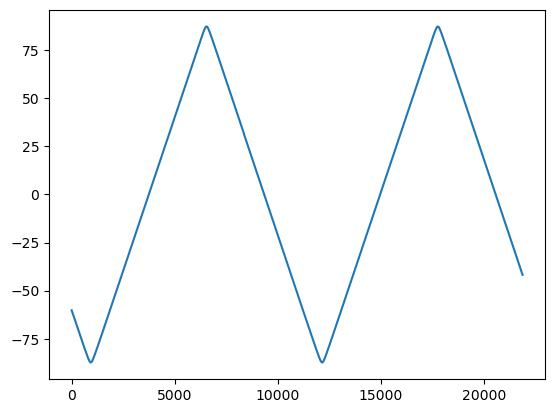

In [11]:
plt.plot(Latitude)

### Longitude

In [12]:
cdf_file.varattsget('Longitude')

{'FIELDNAM': 'Longitude',
 'CATDESC': 'Geocentric longitude.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'degrees',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Longitude',
 'VALIDMIN': np.float32(-180.0),
 'VALIDMAX': np.float32(180.0)}

In [13]:
Longitude = cdf_file.varget('Longitude')
Longitude

array([58.409557, 58.41348 , 58.41741 , ..., 10.399004, 10.399574,
       10.400153], shape=(21864,), dtype=float32)

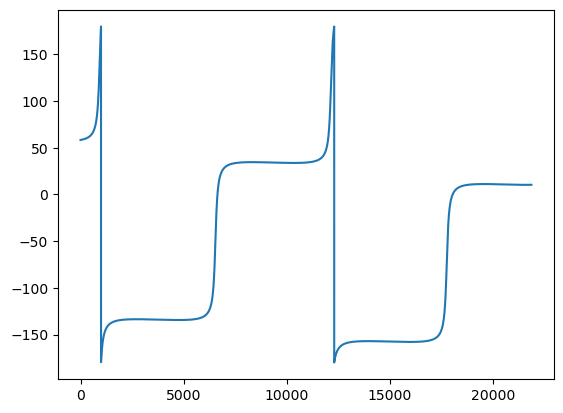

In [14]:
plt.plot(Longitude)

### Radius

In [15]:
cdf_file.varattsget('Radius')

{'FIELDNAM': 'Radius',
 'CATDESC': 'Geocentric radius.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Radius',
 'VALIDMIN': np.float32(6400000.0),
 'VALIDMAX': np.float32(7000000.0)}

In [16]:
Radius = cdf_file.varget('Radius')
Radius

array([6830887. , 6830887.5, 6830888.5, ..., 6829796. , 6829799. ,
       6829800. ], shape=(21864,), dtype=float32)

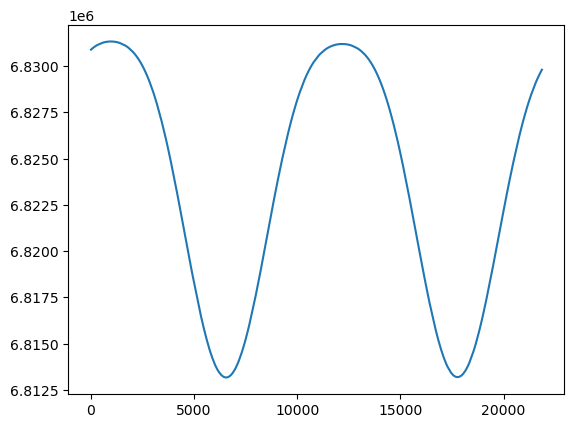

In [17]:
plt.plot(Radius)  # up down about 25km

## geomagnetic coordinate system

### QDLatitude

In [18]:
cdf_file.varattsget('QDLatitude')

{'FIELDNAM': 'QDLatitude',
 'CATDESC': 'Quasi-dipole magnetic latitude.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'degrees',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'QDLatitude',
 'VALIDMIN': np.float32(-90.0),
 'VALIDMAX': np.float32(90.0)}

In [19]:
QDLatitude = cdf_file.varget('QDLatitude')  # km, not as same as `varattsget` output
QDLatitude

array([-64.93128 , -64.9555  , -64.97969 , ..., -46.171616, -46.19125 ,
       -46.210888], shape=(21864,), dtype=float32)

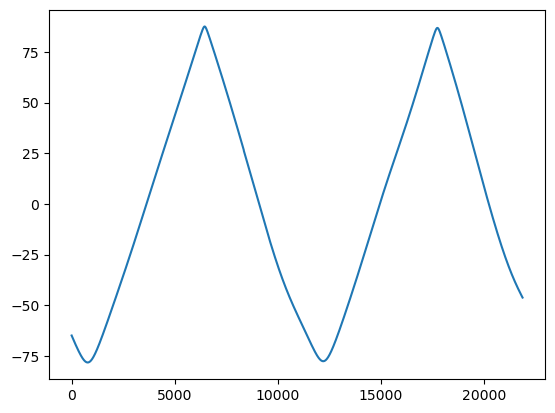

In [20]:
plt.plot(QDLatitude)  # up down about 25km

#### QDLatitude compared with Latitude

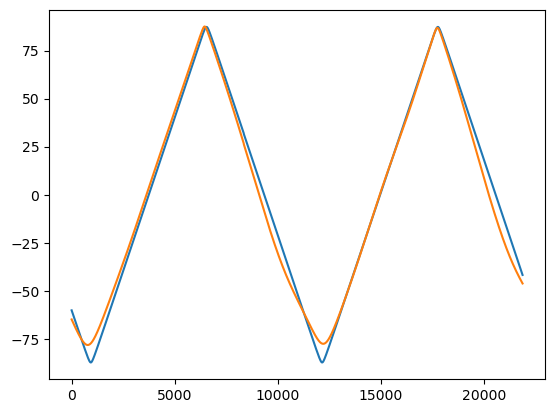

In [21]:
plt.plot(Latitude)
plt.plot(QDLatitude)

### MLT

In [22]:
cdf_file.varattsget('MLT')

{'FIELDNAM': 'MLT',
 'CATDESC': 'Magnetic local time.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'hour',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'MLT',
 'VALIDMIN': np.float32(0.0),
 'VALIDMAX': np.float32(24.0)}

In [23]:
MLT = cdf_file.varget('MLT')  # km, not as same as `varattsget` output
MLT

array([12.172824, 12.170478, 12.16813 , ..., 13.354162, 13.353285,
       13.352406], shape=(21864,), dtype=float32)

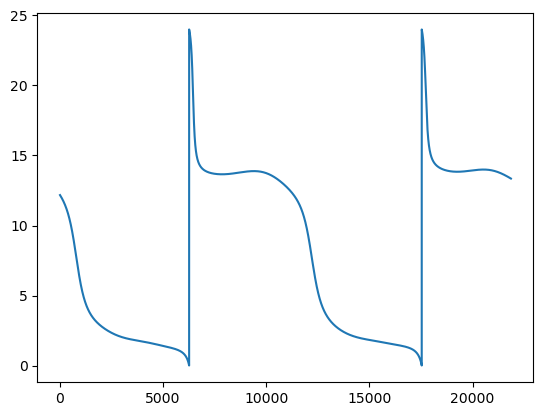

In [24]:
plt.plot(MLT)  # up down about 25km

#### MLT compared with Longitude

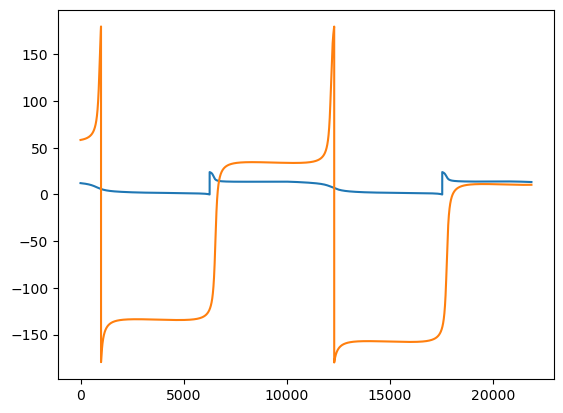

In [25]:
plt.plot(MLT)
plt.plot(Longitude)  # MLT and Longitude are similar

## velocity of ion drift

### Vixh

In [26]:
cdf_file.varattsget('Vixh')

{'FIELDNAM': 'Vixh',
 'CATDESC': 'Along-track ion drift from horizontal TII sensor in satellite-track coordinates.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Vixh',
 'VALIDMIN': np.float32(-8000.0),
 'VALIDMAX': np.float32(8000.0)}

In [27]:
Vixh = cdf_file.varget('Vixh')
Vixh

array([-6372.7314, -6355.5845, -6367.778 , ..., -7127.2627, -7106.0054,
       -7100.6387], shape=(21864,), dtype=float32)

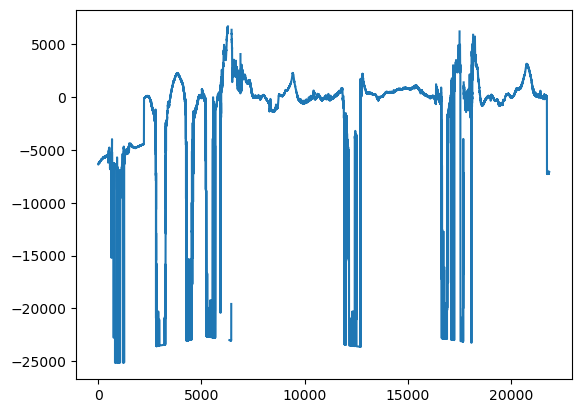

In [28]:
plt.plot(Vixh)

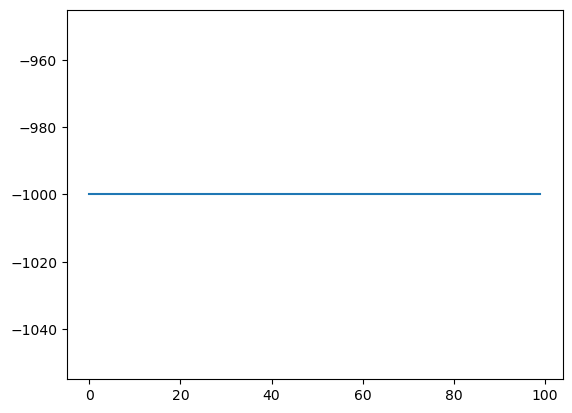

In [29]:
import numpy as np

plt.plot(np.clip(Vixh[:100], -1000, 1000))

#### Vixh_error

In [30]:
cdf_file.varattsget('Vixh_error')

{'FIELDNAM': 'Vixh_error',
 'CATDESC': 'Random error estimate for along-track ion drift from horizontal TII sensor in satellite-track coordinates. Negative value indicates no estimate available.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Vixh_error',
 'VALIDMIN': np.float32(-42.0),
 'VALIDMAX': np.float32(10000.0)}

In [31]:
Vixh_error = cdf_file.varget('Vixh_error')
Vixh_error

array([-14.849242, -14.849242, -14.849242, ..., -14.849242, -14.849242,
       -14.849242], shape=(21864,), dtype=float32)

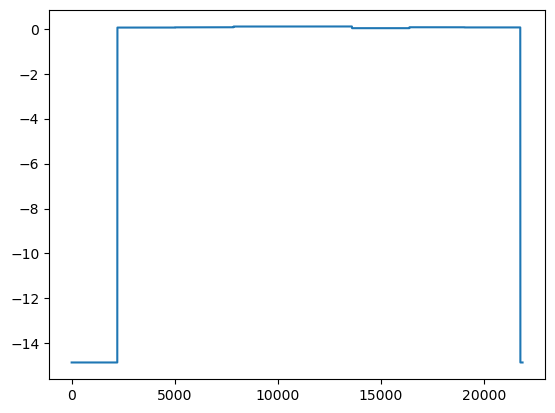

In [32]:
plt.plot(Vixh_error)

### Vixv

In [33]:
cdf_file.varattsget('Vixv')

{'FIELDNAM': 'Vixv',
 'CATDESC': 'Along-track ion drift from vertical TII sensor in satellite-track coordinates.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Vixv',
 'VALIDMIN': np.float32(-8000.0),
 'VALIDMAX': np.float32(8000.0)}

In [34]:
Vixv = cdf_file.varget('Vixv')
Vixv

array([-4830.1133, -4827.0186, -4822.635 , ..., -5890.68  , -5900.6367,
       -5913.7876], shape=(21864,), dtype=float32)

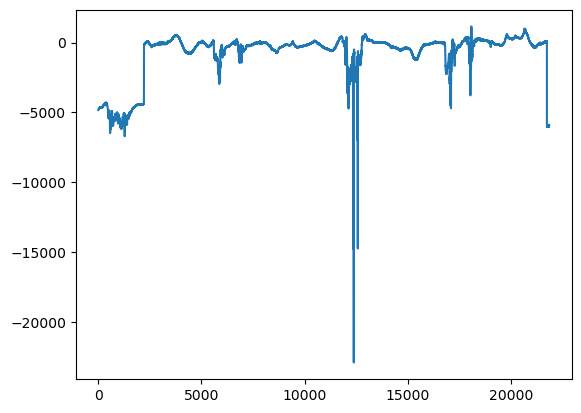

In [35]:
plt.plot(Vixv)

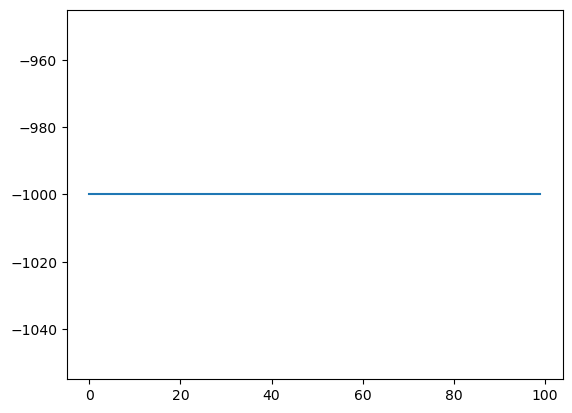

In [36]:
import numpy as np

plt.plot(np.clip(Vixv[:100], -1000, 1000))

#### Vixv_error

In [37]:
cdf_file.varattsget('Vixv_error')

{'FIELDNAM': 'Vixv_error',
 'CATDESC': 'Random error estimate for along-track ion drift from vertical TII sensor in satellite-track coordinates. Negative value indicates no estimate available.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Vixv_error',
 'VALIDMIN': np.float32(-42.0),
 'VALIDMAX': np.float32(10000.0)}

In [38]:
Vixv_error = cdf_file.varget('Vixv_error')
Vixv_error

array([-14.849242, -14.849242, -14.849242, ..., -14.849242, -14.849242,
       -14.849242], shape=(21864,), dtype=float32)

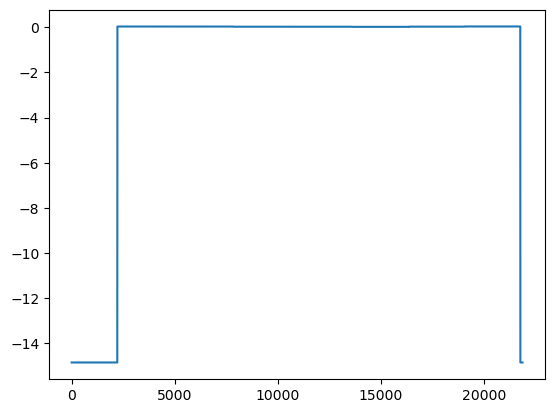

In [39]:
plt.plot(Vixv_error)

### Vixh compared with Vixv

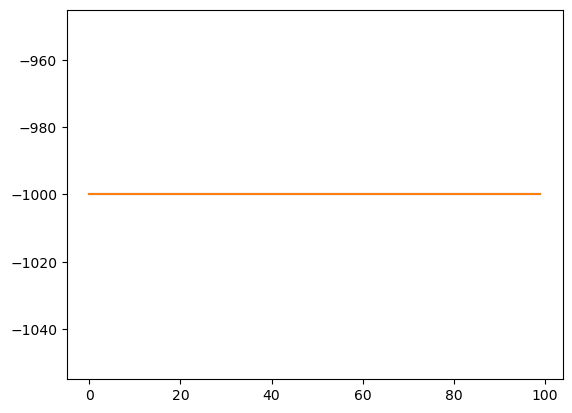

In [40]:
plt.plot(np.clip(Vixh[:100], -1000, 1000))
plt.plot(np.clip(Vixv[:100], -1000, 1000))  # they are very different

### Viy

In [41]:
cdf_file.varattsget('Viy')

{'FIELDNAM': 'Viy',
 'CATDESC': 'Cross-track horizontal ion drift from horizontal TII sensor in satellite-track coordinates.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Viy',
 'VALIDMIN': np.float32(-8000.0),
 'VALIDMAX': np.float32(8000.0)}

In [42]:
Viy = cdf_file.varget('Viy')
Viy

array([ 281.5679 ,  269.7557 ,  280.18604, ..., -190.79587, -225.64845,
       -199.87184], shape=(21864,), dtype=float32)

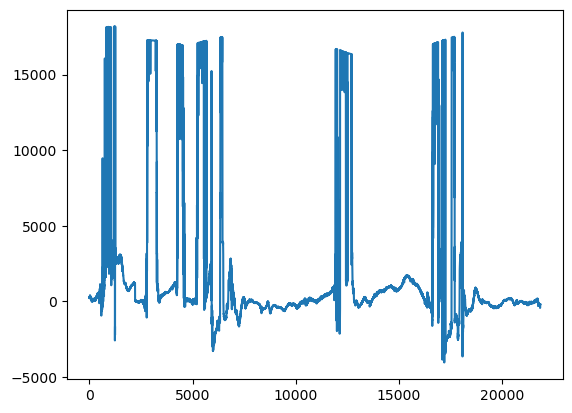

In [43]:
plt.plot(Viy)

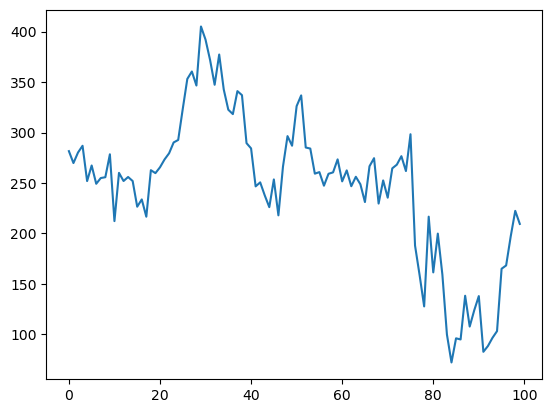

In [44]:
import numpy as np

plt.plot(np.clip(Viy[:100], -1000, 1000))

#### Viy_error

In [45]:
cdf_file.varattsget('Viy_error')

{'FIELDNAM': 'Viy_error',
 'CATDESC': 'Random error estimate for cross-track horizontal ion drift from horizontal TII sensor in satellite-track coordinates. Negative value indicates no estimate available.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Viy_error',
 'VALIDMIN': np.float32(-42.0),
 'VALIDMAX': np.float32(10000.0)}

In [46]:
Viy_error = cdf_file.varget('Viy_error')
Viy_error

array([-14.849242, -14.849242, -14.849242, ..., -14.849242, -14.849242,
       -14.849242], shape=(21864,), dtype=float32)

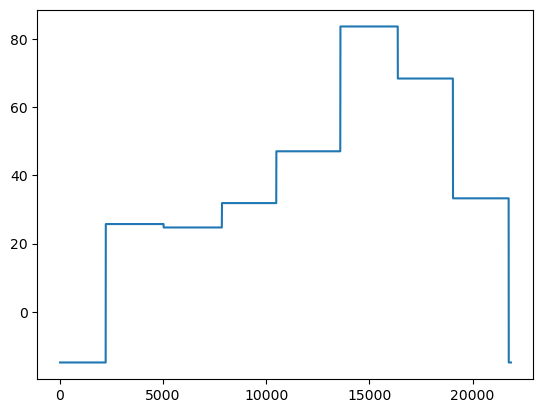

In [47]:
plt.plot(Viy_error)

### Viz

In [48]:
cdf_file.varattsget('Viz')

{'FIELDNAM': 'Viz',
 'CATDESC': 'Cross-track vertical ion drift from vertical TII sensor in satellite-track coordinates.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Viz',
 'VALIDMIN': np.float32(-8000.0),
 'VALIDMAX': np.float32(8000.0)}

In [49]:
Viz = cdf_file.varget('Viz')
Viz

array([ 272.4243 ,  257.93243,  258.21448, ..., -579.6343 , -583.524  ,
       -572.1056 ], shape=(21864,), dtype=float32)

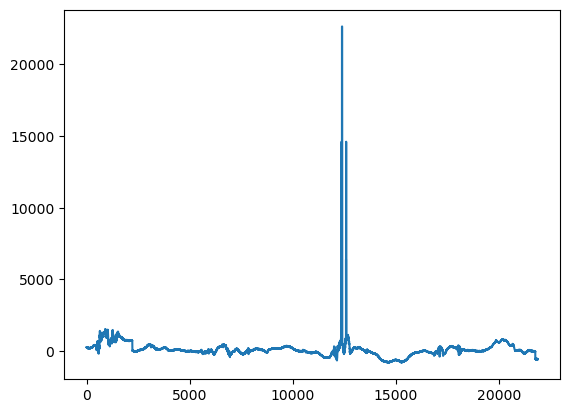

In [50]:
plt.plot(Viz)

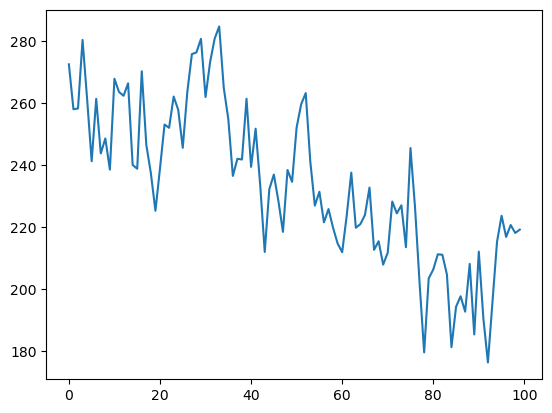

In [51]:
import numpy as np

plt.plot(np.clip(Viz[:100], -1000, 1000))

#### Viz_error

In [52]:
cdf_file.varattsget('Viz_error')

{'FIELDNAM': 'Viz_error',
 'CATDESC': 'Random error estimate for cross-track vertical ion drift from vertical TII sensor in satellite-track coordinates. Negative value indicates no estimate available.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Viz_error',
 'VALIDMIN': np.float32(-42.0),
 'VALIDMAX': np.float32(10000.0)}

In [53]:
Viz_error = cdf_file.varget('Viz_error')
Viz_error

array([-14.849242, -14.849242, -14.849242, ..., -14.849242, -14.849242,
       -14.849242], shape=(21864,), dtype=float32)

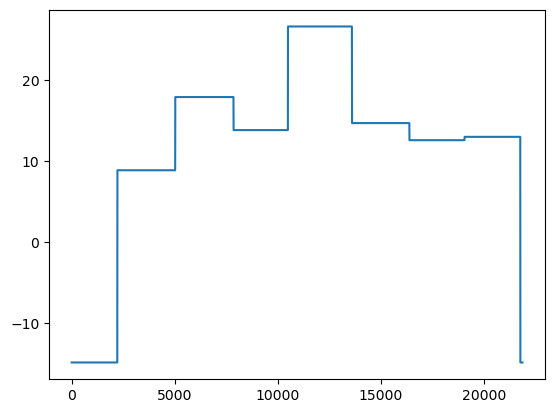

In [54]:
plt.plot(Viz_error)

## satellite velocity

- calculate transformation matrix?

### VsatN

In [55]:
cdf_file.varattsget('VsatN')

{'FIELDNAM': 'VsatN',
 'CATDESC': 'Satellite velocity N component in north-east-centre coordinates.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'VsatN',
 'VALIDMIN': np.float32(-8000.0),
 'VALIDMAX': np.float32(8000.0)}

In [56]:
VsatN = cdf_file.varget('VsatN')
VsatN

array([-7596.202 , -7596.132 , -7596.06  , ..., -7619.3145, -7619.291 ,
       -7619.268 ], shape=(21864,), dtype=float32)

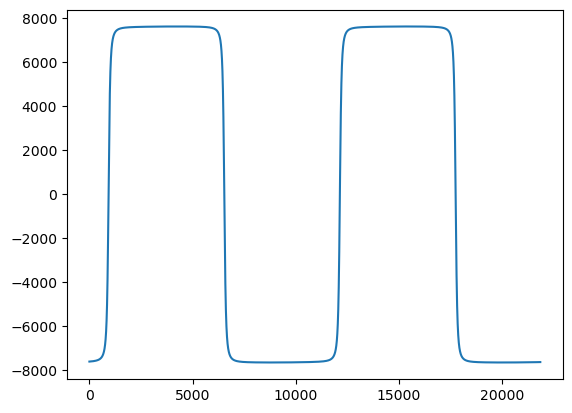

In [57]:
plt.plot(VsatN)

### VsatE

In [58]:
cdf_file.varattsget('VsatE')

{'FIELDNAM': 'VsatE',
 'CATDESC': 'Satellite velocity E component in north-east-centre coordinates.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'VsatE',
 'VALIDMIN': np.float32(-8000.0),
 'VALIDMAX': np.float32(8000.0)}

In [59]:
VsatE = cdf_file.varget('VsatE')
VsatE

array([464.46777, 465.3998 , 466.3339 , ..., 101.91585, 102.33616,
       102.75708], shape=(21864,), dtype=float32)

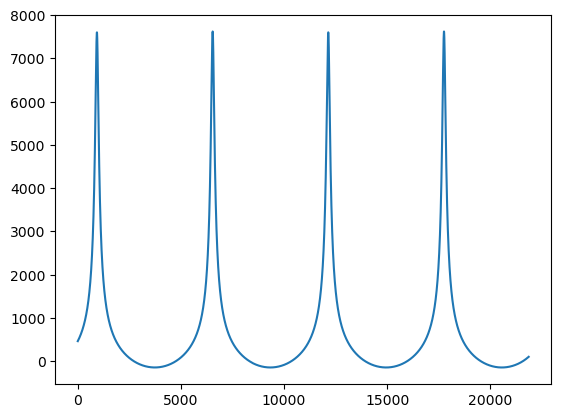

In [60]:
plt.plot(VsatE)

### VsatC

In [61]:
cdf_file.varattsget('VsatC')

{'FIELDNAM': 'VsatC',
 'CATDESC': 'Satellite velocity C component in north-east-centre coordinates.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'VsatC',
 'VALIDMIN': np.float32(-200.0),
 'VALIDMAX': np.float32(200.0)}

In [62]:
VsatC = cdf_file.varget('VsatC')
VsatC

array([-22.504871, -22.488283, -22.471645, ..., -27.728086, -27.726826,
       -27.725449], shape=(21864,), dtype=float32)

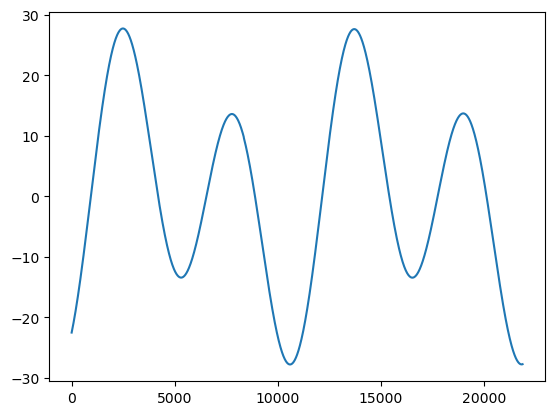

In [63]:
plt.plot(VsatC)

### Vsat

$Vsat = \sqrt{VsatN**2 + VsatE**2 + VsatC**2}$

In [64]:
Vsat = np.sqrt(VsatN ** 2 + VsatE ** 2 + VsatC ** 2)
Vsat

array([7610.4224, 7610.4087, 7610.394 , ..., 7620.0464, 7620.029 ,
       7620.011 ], shape=(21864,), dtype=float32)

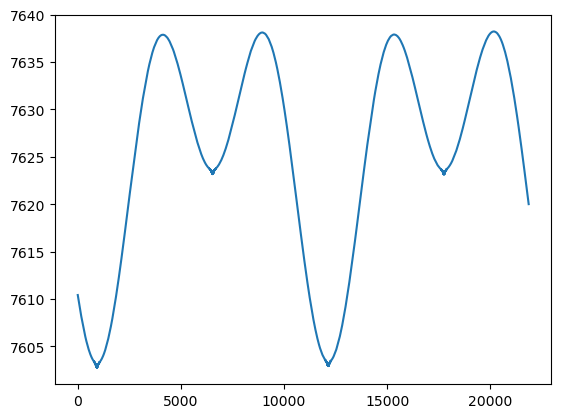

In [65]:
plt.plot(Vsat)

In [66]:
Vsat.max() - Vsat.min()  # m/s

np.float32(35.45117)

## Electric filed

### Ehx

In [67]:
cdf_file.varattsget(
    'Ehx')  # use the velocity of ion drift and measurement magnetic field to calculate the electric field

{'FIELDNAM': 'Ehx',
 'CATDESC': 'Electric field x component in satellite-track coordinates, derived from -VxB with along-track ion drift from horizontal sensor.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'mV/m',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Ehx',
 'VALIDMIN': np.float32(-400.0),
 'VALIDMAX': np.float32(400.0)}

In [68]:
Ehx = cdf_file.varget('Ehx')
Ehx

array([13.108665 , 12.525877 , 12.899471 , ..., -6.0041323, -6.6898155,
       -6.151479 ], shape=(21864,), dtype=float32)

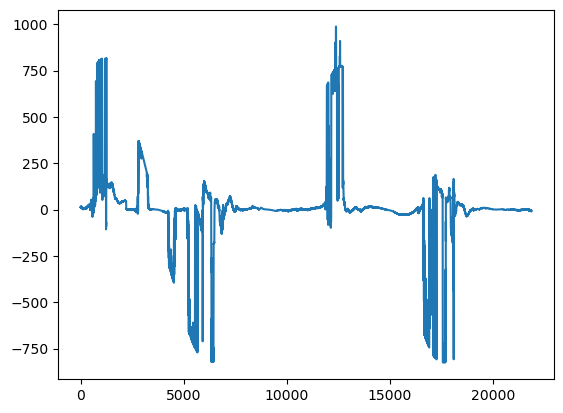

In [69]:
plt.plot(Ehx)

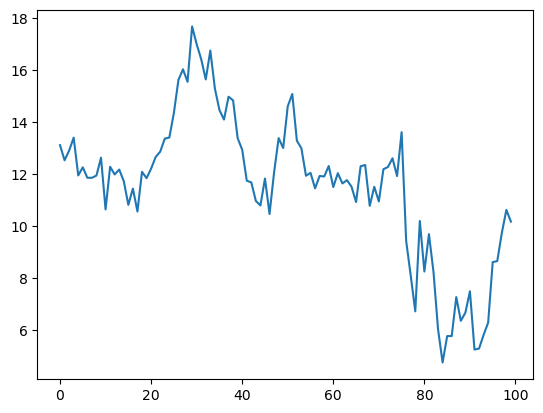

In [70]:
plt.plot(np.clip(Ehx[:100], -200, 200))

### Ehy

In [71]:
cdf_file.varattsget(
    'Ehy')  # use the velocity of ion drift and measurement magnetic field to calculate the electric field

{'FIELDNAM': 'Ehy',
 'CATDESC': 'Electric field y component in satellite-track coordinates, derived from -VxB with along-track ion drift from horizontal sensor.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'mV/m',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Ehy',
 'VALIDMIN': np.float32(-400.0),
 'VALIDMAX': np.float32(400.0)}

In [72]:
Ehy = cdf_file.varget('Ehy')
Ehy

array([226.47383, 225.81053, 226.29317, ..., 131.47531, 131.04416,
       131.05281], shape=(21864,), dtype=float32)

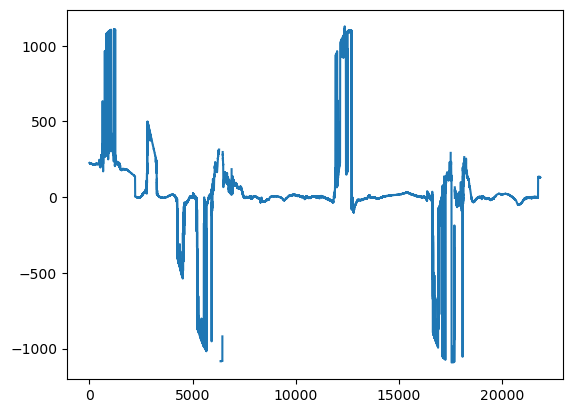

In [73]:
plt.plot(Ehy)

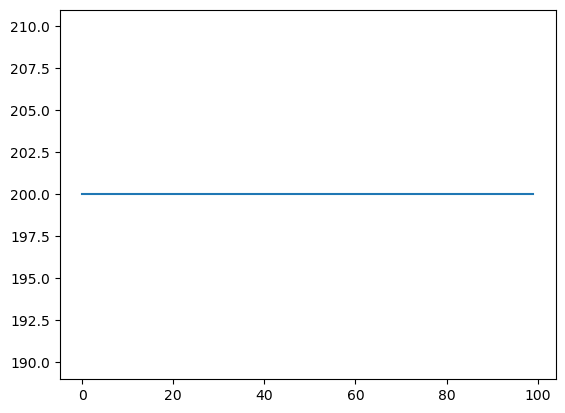

In [74]:
plt.plot(np.clip(Ehy[:100], -200, 200))

### Ehz

In [75]:
cdf_file.varattsget(
    'Ehz')  # use the velocity of ion drift and measurement magnetic field to calculate the electric field

{'FIELDNAM': 'Ehz',
 'CATDESC': 'Electric field z component in satellite-track coordinates, derived from -VxB with along-track ion drift from horizontal sensor.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'mV/m',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Ehz',
 'VALIDMIN': np.float32(-400.0),
 'VALIDMAX': np.float32(400.0)}

In [76]:
Ehz = cdf_file.varget('Ehz')
Ehz

array([72.571075, 72.48185 , 72.56357 , ..., 30.55    , 30.792547,
       30.563772], shape=(21864,), dtype=float32)

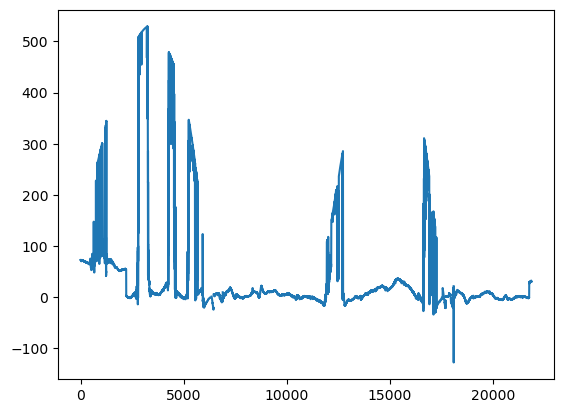

In [77]:
plt.plot(Ehz)

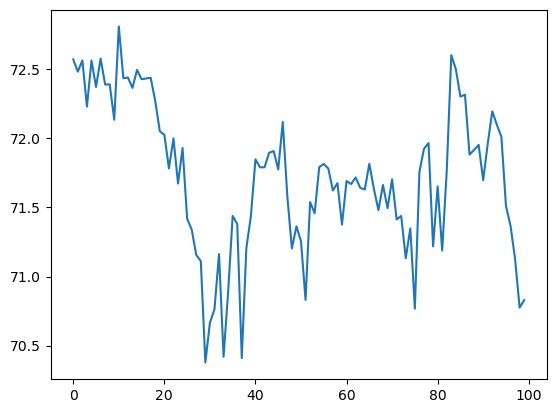

In [78]:
plt.plot(np.clip(Ehz[:100], -200, 200))

### Evx

In [79]:
cdf_file.varattsget(
    'Evx')  # use the velocity of ion drift and measurement magnetic field to calculate the electric field

{'FIELDNAM': 'Evx',
 'CATDESC': 'Electric field x component in satellite-track coordinates, derived from -VxB with along-track ion drift from vertical sensor.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'mV/m',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Evx',
 'VALIDMIN': np.float32(-400.0),
 'VALIDMAX': np.float32(400.0)}

In [80]:
Evx = cdf_file.varget('Evx')
Evx

array([13.108665 , 12.525877 , 12.899471 , ..., -6.0041323, -6.6898155,
       -6.151479 ], shape=(21864,), dtype=float32)

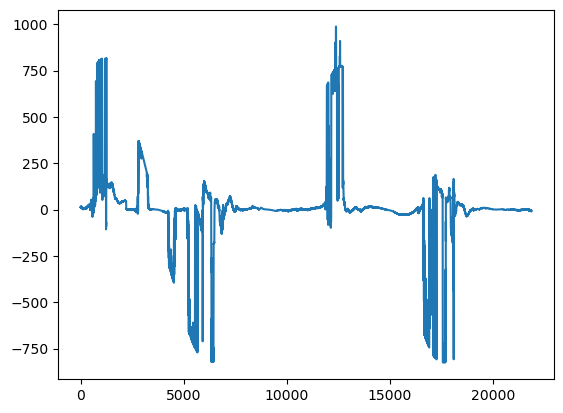

In [81]:
plt.plot(Evx)

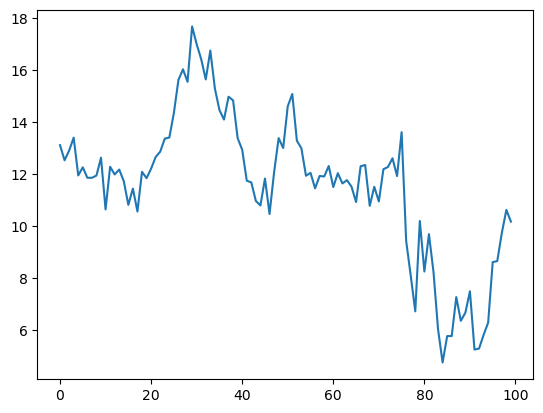

In [82]:
plt.plot(np.clip(Evx[:100], -200, 200))

### Evy

In [83]:
cdf_file.varattsget(
    'Evy')  # use the velocity of ion drift and measurement magnetic field to calculate the electric field

{'FIELDNAM': 'Evy',
 'CATDESC': 'Electric field y component in satellite-track coordinates, derived from -VxB with along-track ion drift from vertical sensor.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'mV/m',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Evy',
 'VALIDMIN': np.float32(-400.0),
 'VALIDMAX': np.float32(400.0)}

In [84]:
Evy = cdf_file.varget('Evy')
Evy

array([172.14644, 171.96596, 171.85194, ..., 107.77601, 107.94099,
       108.30249], shape=(21864,), dtype=float32)

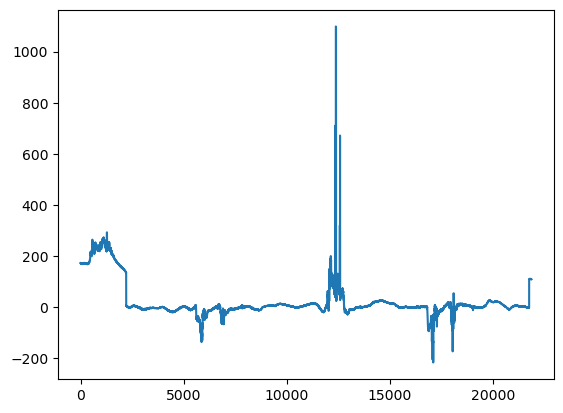

In [85]:
plt.plot(Evy)

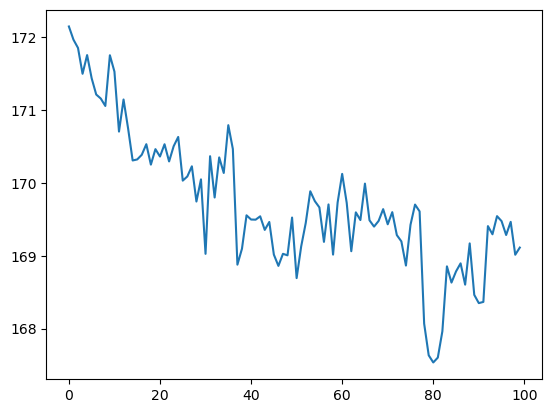

In [86]:
plt.plot(np.clip(Evy[:100], -200, 200))

### Evz

In [87]:
cdf_file.varattsget(
    'Evz')  # use the velocity of ion drift and measurement magnetic field to calculate the electric field

{'FIELDNAM': 'Evz',
 'CATDESC': 'Electric field z component in satellite-track coordinates, derived from -VxB with along-track ion drift from vertical sensor.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'mV/m',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Evz',
 'VALIDMIN': np.float32(-400.0),
 'VALIDMAX': np.float32(400.0)}

In [88]:
Evz = cdf_file.varget('Evz')
Evz

array([54.493393, 54.563587, 54.44716 , ..., 25.541973, 25.907495,
       25.7504  ], shape=(21864,), dtype=float32)

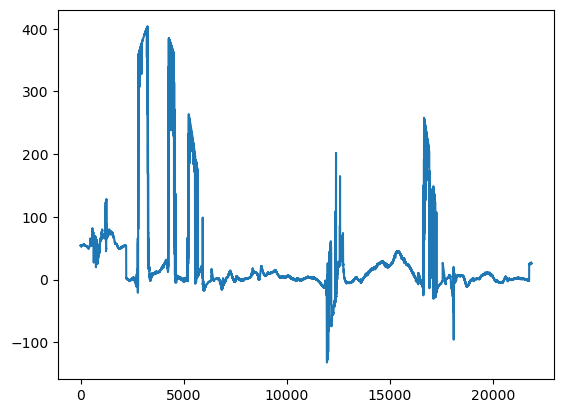

In [89]:
plt.plot(Evz)

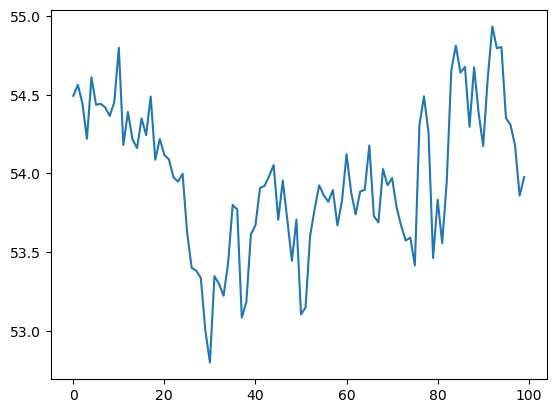

In [90]:
plt.plot(np.clip(Evz[:100], -200, 200))

### Ehx compared with Evx

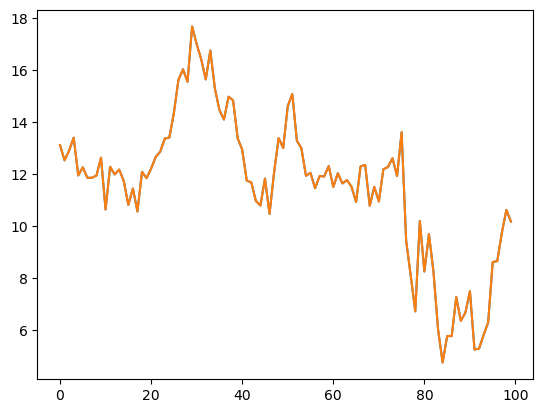

In [91]:
plt.plot(np.clip(Ehx[:100], -200, 200))
plt.plot(np.clip(Evx[:100], -200, 200))

### Ehy compared with Evy

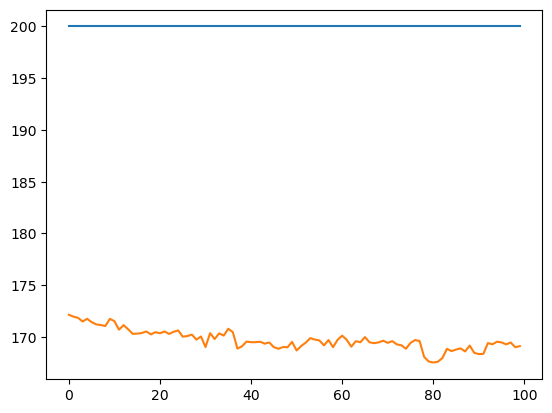

In [92]:
plt.plot(np.clip(Ehy[:100], -200, 200))
plt.plot(np.clip(Evy[:100], -200, 200))

### Ehz compared with Evz

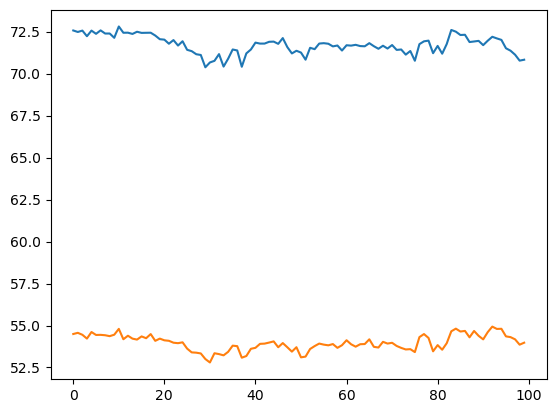

In [93]:
plt.plot(np.clip(Ehz[:100], -200, 200))
plt.plot(np.clip(Evz[:100], -200,
                 200))  # so, just the Ehx is the same as Evx. the Ehy and Evy are different. The Ehz and Evz are different.

## magnetic field

### Bx

In [94]:
cdf_file.varattsget('Bx')  # fs is 1 hz or 16 hz?

{'FIELDNAM': 'Bx',
 'CATDESC': 'Geomagnetic field x component in satellite-track coordinates, derived from the 1 Hz product.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'nT',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Bx',
 'VALIDMIN': np.float32(-65000.0),
 'VALIDMAX': np.float32(65000.0)}

In [95]:
Bx = cdf_file.varget('Bx')
Bx

array([-7493.312, -7488.517, -7484.141, ..., -8832.882, -8835.832,
       -8838.796], shape=(21864,), dtype=float32)

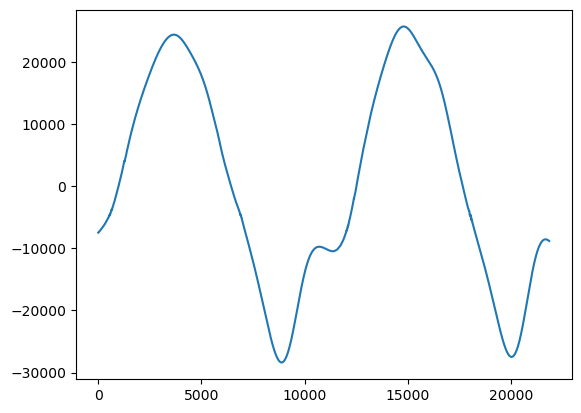

In [96]:
plt.plot(Bx)

### By

In [97]:
cdf_file.varattsget('By')

{'FIELDNAM': 'By',
 'CATDESC': 'Geomagnetic field y component in satellite-track coordinates, derived from the 1 Hz product.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'nT',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'By',
 'VALIDMIN': np.float32(-65000.0),
 'VALIDMAX': np.float32(65000.0)}

In [98]:
By = cdf_file.varget('By')
By

array([11718.829 , 11722.277 , 11724.737 , ...,  4049.895 ,  4052.734 ,
        4055.5713], shape=(21864,), dtype=float32)

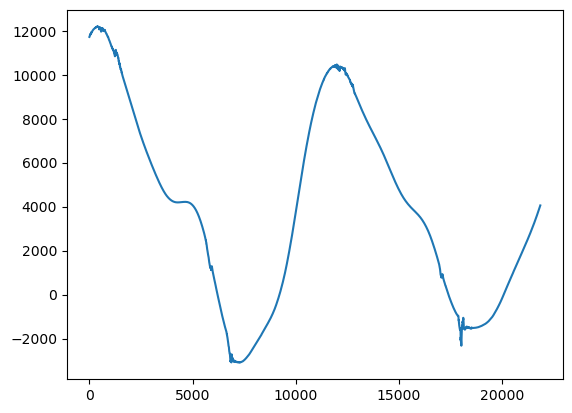

In [99]:
plt.plot(By)

### Bz

In [100]:
cdf_file.varattsget('Bz')

{'FIELDNAM': 'Bz',
 'CATDESC': 'Geomagnetic field z component in satellite-track coordinates, derived from the 1 Hz product.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'nT',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Bz',
 'VALIDMIN': np.float32(-65000.0),
 'VALIDMAX': np.float32(65000.0)}

In [101]:
Bz = cdf_file.varget('Bz')
Bz

array([-35217.625, -35225.562, -35233.74 , ..., -19165.164, -19166.895,
       -19168.633], shape=(21864,), dtype=float32)

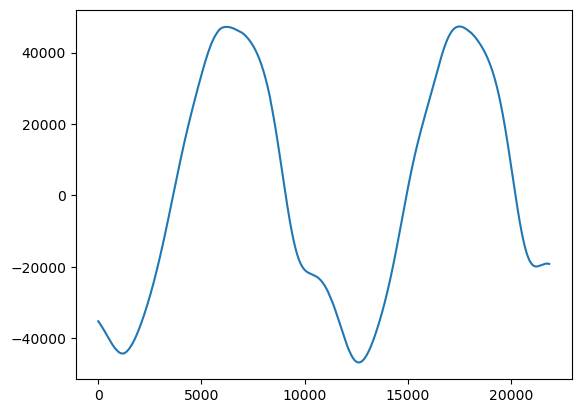

In [102]:
plt.plot(Bz)

## ion drift corotation

### Vicrx

In [103]:
cdf_file.varattsget('Vicrx')

{'FIELDNAM': 'Vicrx',
 'CATDESC': 'Ion drift corotation signal x component in satellite-track coorinates. This has been removed from ion drift and electric field.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Vicrx',
 'VALIDMIN': np.float32(-1000.0),
 'VALIDMAX': np.float32(1000.0)}

In [104]:
Vicrx = cdf_file.varget('Vicrx')
Vicrx

array([-15.282992, -15.290638, -15.298296, ..., -14.247787, -14.235945,
       -14.224115], shape=(21864,), dtype=float32)

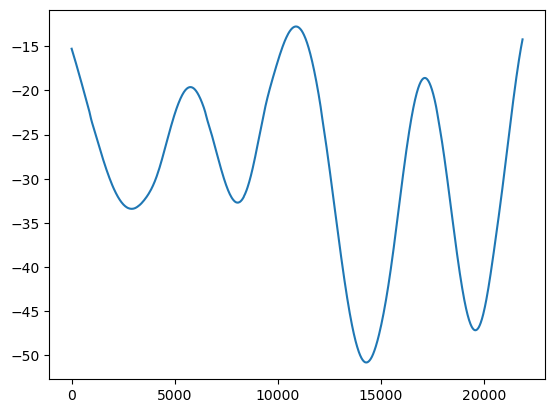

In [105]:
plt.plot(Vicrx)

### Vicry

In [106]:
cdf_file.varattsget('Vicry')

{'FIELDNAM': 'Vicry',
 'CATDESC': 'Ion drift corotation signal y component in satellite-track coorinates. This has been removed from ion drift and electric field.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Vicry',
 'VALIDMIN': np.float32(-1000.0),
 'VALIDMAX': np.float32(1000.0)}

In [107]:
Vicry = cdf_file.varget('Vicry')
Vicry

array([247.09747, 246.8562 , 246.61487, ..., 371.44678, 371.26224,
       371.0775 ], shape=(21864,), dtype=float32)

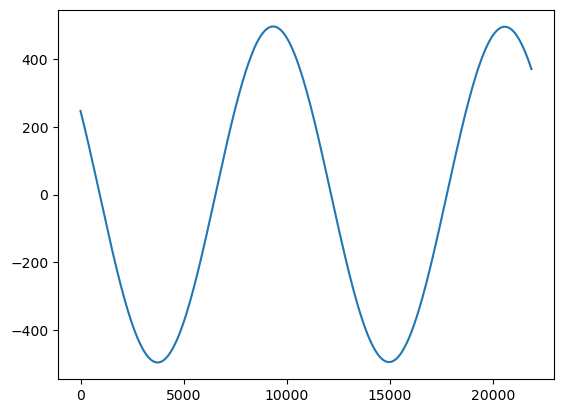

In [108]:
plt.plot(Vicry)

### Vicrz

In [109]:
cdf_file.varattsget('Vicrz')

{'FIELDNAM': 'Vicrz',
 'CATDESC': 'Ion drift corotation signal z component in satellite-track coorinates. This has been removed from ion drift and electric field.',
 'Type': 'CDF_FLOAT',
 'UNITS': 'm/s',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Vicrz',
 'VALIDMIN': np.float32(-1000.0),
 'VALIDMAX': np.float32(1000.0)}

In [110]:
Vicrz = cdf_file.varget('Vicrz')
Vicrz

array([-2.1253603, -2.1232936, -2.1212263, ..., -7.676317 , -7.6792083,
       -7.6820807], shape=(21864,), dtype=float32)

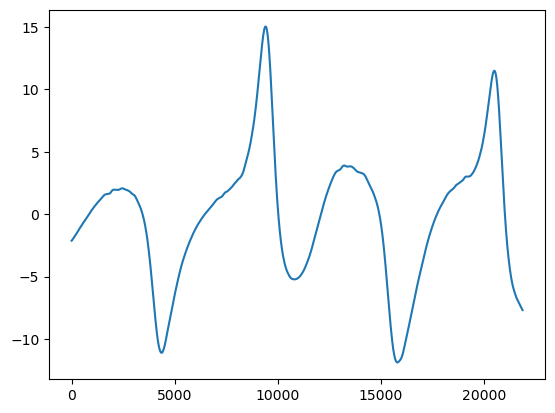

In [111]:
plt.plot(Vicrz)

## Quality_flags

In [112]:
cdf_file.varattsget('Quality_flags')

{'FIELDNAM': 'Quality_flags',
 'CATDESC': 'Bitwise flag for each velocity component, where a value of 1 for a particular component signifies that calibration was successful, and that the baseline 1-sigma noise level is less than or equal to 100 m/s at 2 Hz. Electric field quality can be assessed from these flags according to -vxB. Bit0 (least significant) = Vixh, bit1 = Vixv, bit2 = Viy, bit3 = Viz. Refer to the release notes for details.',
 'Type': 'CDF_UINT2',
 'UNITS': '',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Quality_flags',
 'VALIDMIN': np.uint16(0),
 'VALIDMAX': np.uint16(65535)}

In [113]:
Quality_flags = cdf_file.varget('Quality_flags')  # 4 -> 0100; 0 -> 0000
Quality_flags

array([0, 0, 0, ..., 0, 0, 0], shape=(21864,), dtype=uint16)

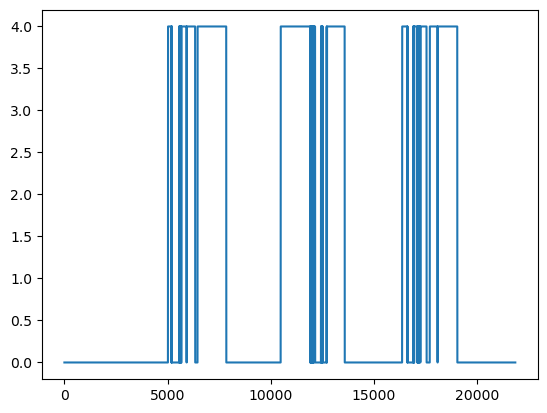

In [114]:
plt.plot(Quality_flags)

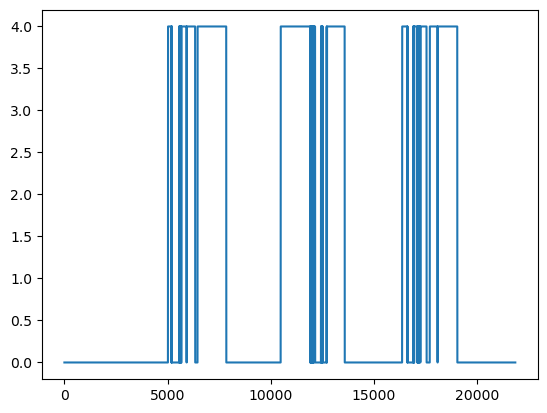

In [115]:
plt.plot(Quality_flags[
         :100000])  # 1 is good. only 'Viy' equals to 1 in some times. **still use 'Ehx'** though 'Viz' quality_flag is not 1 (quality of 'Ehx' cannot be guaranteed, but it is still better than 'Ehy', 'Evy', 'Ehz', 'Evz'.)

## Calibration_flags

In [116]:
cdf_file.varattsget('Calibration_flags')

{'FIELDNAM': 'Calibration_flags',
 'CATDESC': 'Information about the calibration process. Refer to the release notes for details.',
 'Type': 'CDF_UINT4',
 'UNITS': '',
 'VAR_TYPE': 'data',
 'DEPEND_0': 'Time',
 'DISPLAY_TYPE': 'time_series',
 'LABLAXIS': 'Calibration_flags',
 'VALIDMIN': np.uint32(0),
 'VALIDMAX': np.uint32(4294967295)}

In [117]:
Calibration_flags = cdf_file.varget('Calibration_flags')
Calibration_flags

array([3221225471, 3220921115, 3221225471, ..., 3808632831, 3808640895,
       3808641023], shape=(21864,), dtype=uint32)

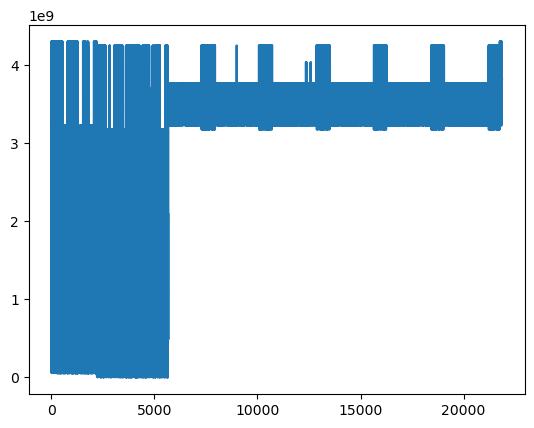

In [118]:
plt.plot(Calibration_flags)

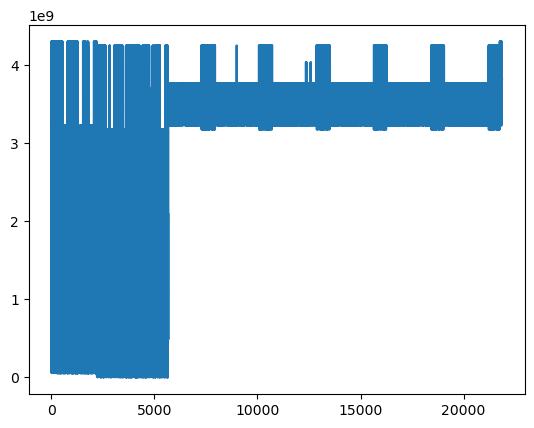

In [119]:
plt.plot(Calibration_flags[:100000])  # 0 is good. most is 0.